In [1]:
import numpy as np

from lightfm.datasets import fetch_movielens

data = fetch_movielens(min_rating=5.0)

/Users/konstantinorlovskiy/opt/anaconda3/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [2]:
print(repr(data['train']))
print(repr(data['test']))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 19048 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 2153 stored elements in COOrdinate format>


In [3]:
from lightfm import LightFM

In [4]:
model = LightFM(loss='warp')
%time model.fit(data['train'], epochs=30, num_threads=2)

CPU times: user 312 ms, sys: 3.21 ms, total: 315 ms
Wall time: 315 ms


In [41]:
def learning_vis_auc(train, test, item_features, epochs):
    
    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import time
    import seaborn as sns
    import matplotlib.pyplot as plt
    import csv
    import json

    from itertools import islice

    from scipy.sparse import coo_matrix  # LightFM fit method requires coo matrix format as input.
    from scipy.sparse import csr_matrix

    from lightfm import LightFM
    from lightfm.evaluation import auc_score
    from lightfm.evaluation import precision_at_k
    from lightfm.cross_validation import random_train_test_split
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import train_test_split
    from lightfm.data import Dataset

    stats = pd.DataFrame(columns = ['epochs', 'train_auc', 'test_auc', 'runtime_min'])
    model_hybrid = LightFM(no_components=100, loss='warp', random_state=2020)
    
    
    for epoch in range(1,epochs+1):
        
        start_time = time.time()
        
        model_hybrid.fit(train, 
                     item_features=item_features, 
                     epochs=epoch, 
                     num_threads=4)
        
        train_auc = auc_score(model_hybrid, 
                      train, 
                      item_features=item_features, 
                      num_threads=4).mean()

        test_auc = auc_score(model_hybrid,
                     test, 
                     item_features=item_features, 
                     train_interactions = train, 
                     num_threads=4).mean()

        runtime_min = round((time.time()-start_time)/60, 6)        
        
        stats = stats.append({
            'epochs': int(epoch), 
            'train_auc': float(train_auc), 
            'test_auc': float(test_auc),
            'runtime_min': float(runtime_min)},
            ignore_index=True)
        
    
    import matplotlib.pyplot as plt
    figure, axis = plt.subplots()
    figure.suptitle('Learning progress: AUC')
    axis.plot(stats['epochs'], stats['train_auc'], label='train')
    axis.plot(stats['epochs'], stats['test_auc'], label='test')
    axis.set_xlabel('Epochs')
    axis.set_ylabel('AUC score')
    axis.legend()
    
    return(figure, stats)

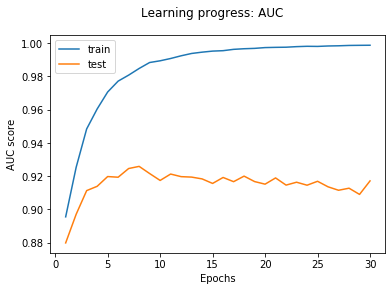

In [43]:
tmp = learning_vis_auc(data['train'], data['test'], item_features=None, epochs=30)

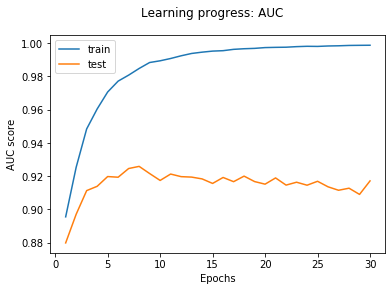

In [44]:
tmp[0]

In [45]:
tmp[1]

,epochs,train_auc,test_auc,runtime_min
0,1.0,0.895538,0.879845,0.003658
1,2.0,0.925362,0.897087,0.004004
2,3.0,0.948426,0.911320,0.004618
3,4.0,0.960441,0.913901,0.005151
4,5.0,0.970649,0.919778,0.005773
5,6.0,0.977201,0.919378,0.006313
6,7.0,0.980807,0.924607,0.008005
7,8.0,0.984814,0.925902,0.009058
8,9.0,0.988397,0.921589,0.008905
9,10.0,0.989432,0.917443,0.008723


In [46]:
def learning_vis_precision(train, test, item_features, k, epochs):
    
    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import time
    import seaborn as sns
    import matplotlib.pyplot as plt
    import csv
    import json

    from itertools import islice

    from scipy.sparse import coo_matrix  # LightFM fit method requires coo matrix format as input.
    from scipy.sparse import csr_matrix

    from lightfm import LightFM
    from lightfm.evaluation import auc_score
    from lightfm.evaluation import precision_at_k
    from lightfm.cross_validation import random_train_test_split
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import train_test_split
    from lightfm.data import Dataset


    
    stats = pd.DataFrame(columns = ['epochs', 'train_precision', 'test_precision', '@k' 'runtime_min'])
    model_hybrid = LightFM(no_components=100, loss='warp', random_state=2020)
    
    
    for epoch in range(1,epochs+1):
        
        start_time = time.time()
        
        model_hybrid.fit(train, 
                     item_features=item_features, 
                     epochs=epoch, 
                     num_threads=4)
        
        train_precision = precision_at_k(model_hybrid, 
                                 train,
                                 item_features=item_features, 
                                 num_threads=4, 
                                 k=k).mean()

        test_precision = precision_at_k(model_hybrid, 
                                 test,
                                 item_features=item_features, 
                                 num_threads=4, 
                                 k=k).mean()

        runtime_min = round((time.time()-start_time)/60, 6)        
        
        stats = stats.append({
            'epochs': int(epoch), 
            'train_precision': float(train_precision), 
            'test_precision': float(test_precision),
            '@k': int(k), 
            'runtime_min': float(runtime_min)},
            ignore_index=True)
        
    
    import matplotlib.pyplot as plt
    figure, axis = plt.subplots()
    figure.suptitle('Learning progress: precision @%s' %k)
    axis.plot(stats['epochs'], stats['train_precision'], label='train')
    axis.plot(stats['epochs'], stats['test_precision'], label='test')
    axis.set_xlabel('Epochs')
    axis.set_ylabel('Precision')
    axis.legend()
    
    return(figure, stats)

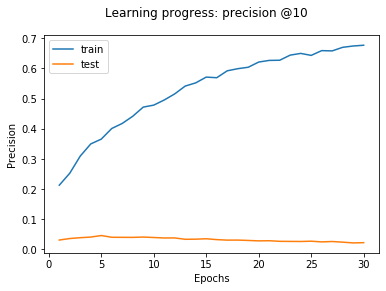

In [50]:
tmp2 = learning_vis_precision(data['train'], data['test'], item_features=None, k=10, epochs=30)

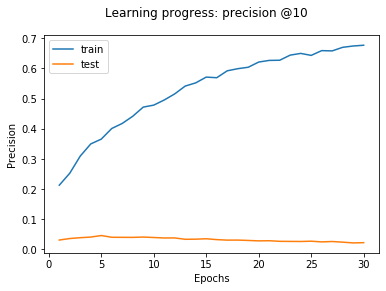

In [51]:
tmp2[0]

In [52]:
tmp2[1]

,epochs,train_precision,test_precision,@kruntime_min,@k,runtime_min
0,1.0,0.212924,0.031044,NaN,10.0,0.003482
1,2.0,0.252683,0.036063,NaN,10.0,0.003825
2,3.0,0.309529,0.038838,NaN,10.0,0.004360
3,4.0,0.349726,0.040951,NaN,10.0,0.005006
4,5.0,0.365608,0.045971,NaN,10.0,0.005787
5,6.0,0.400876,0.040291,NaN,10.0,0.006258
6,7.0,0.417634,0.040026,NaN,10.0,0.007006
7,8.0,0.441402,0.039894,NaN,10.0,0.007222
8,9.0,0.471741,0.040951,NaN,10.0,0.009065
9,10.0,0.478313,0.039498,NaN,10.0,0.009429


In [5]:
from lightfm.evaluation import precision_at_k

In [6]:
print("Train precision: %.2f" % precision_at_k(model, data['train'], k=5).mean())
print("Test precision: %.2f" % precision_at_k(model, data['test'], k=5).mean())

Train precision: 0.39
Test precision: 0.05


In [9]:
data['item_labels'][1:10]

array(['GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)',
       'Copycat (1995)',
       'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
       'Twelve Monkeys (1995)', 'Babe (1995)', 'Dead Man Walking (1995)',
       'Richard III (1995)'], dtype=object)

In [11]:
data['train']

<943x1682 sparse matrix of type '<class 'numpy.float32'>'
	with 19048 stored elements in COOrdinate format>

In [13]:
data

{'train': <943x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 19048 stored elements in COOrdinate format>,
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 2153 stored elements in COOrdinate format>,
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)}

In [7]:
def sample_recommendation(model, data, user_ids):


    n_users, n_items = data['train'].shape

    for user_id in user_ids:
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]

        scores = model.predict(user_id, np.arange(n_items))
        top_items = data['item_labels'][np.argsort(-scores)]

        print("User %s" % user_id)
        print("     Known positives:")

        for x in known_positives[:3]:
            print("        %s" % x)

        print("     Recommended:")

        for x in top_items[:3]:
            print("        %s" % x)

sample_recommendation(model, data, [3, 25, 450])

User 3
     Known positives:
        Contact (1997)
        Air Force One (1997)
        In & Out (1997)
     Recommended:
        Chasing Amy (1997)
        Lost Highway (1997)
        Devil's Own, The (1997)
User 25
     Known positives:
        Fargo (1996)
        Godfather, The (1972)
        L.A. Confidential (1997)
     Recommended:
        Fargo (1996)
        L.A. Confidential (1997)
        Star Wars (1977)
User 450
     Known positives:
        Event Horizon (1997)
        Scream (1996)
        Conspiracy Theory (1997)
     Recommended:
        Air Force One (1997)
        Scream (1996)
        Twister (1996)


In [28]:
n_users, n_items = data['train'].shape
n_items

1682

In [29]:
np.arange(n_items)

array([   0,    1,    2, ..., 1679, 1680, 1681])